# KMeans Review

# Describe the process of the KMeans Algorithm

Question: What form do we need the target to be in?

In [1]:
# Your answer here
# unlabeled/unsupervised - don't need labels for algorithm to learn. we are trying to create 
#the labels. not working with targets but creating them
# distinct groups that have similar characteristics between the groups


### Describe Step 1 (think initializations)

> pick how many clusters you want. 
> centroids : randomly selects points/smarter selection of points (kmeans++)

### Describe Step 2 (think distance)

> uses distance formulas to find the distance from each point to the centroids

### Describe Step 3 (think assignment)

> assign the points to the closest centroid and assigns labels for the one it is closest to

### Describe Step 4 (think updates)

> move centroid closer to the center to minimize distances and update the assignment of points to closest cluster

> algorithm updates the centroid positions by taking the mean of all points that have been assigned that label

### When does the algorithm stop?

> centroids stop moving, essentially. stop moving less than a critical threshold or max number of iterations reached

### Define inertia

> sum of squared distance of points from its assigned centroid. 

# Activity

Let's practice k-means clustering with an image of a piece of art. 

In [3]:
# Our new clustering class
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
# Allows us to visualize images through matplotlib plot methods
import matplotlib.image as mpimg

# Old favorites
import pandas as pd
import numpy as np

Let's look at a colorful Miro painting with matplotlib.

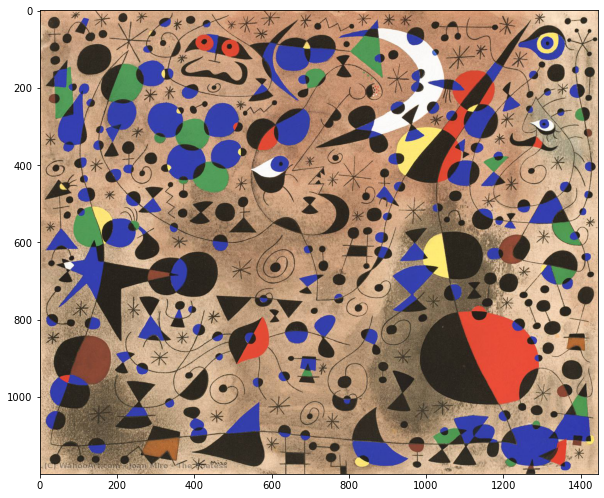

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
img = mpimg.imread('data/miro.jpg')
imgplot = ax.imshow(img)

In [8]:
# What is the shape of the image, and what does each component represent?
img.shape
#height, widgth, z axis/color

(1200, 1445, 3)

In [7]:
img

array([[[234, 194, 158],
        [230, 190, 154],
        [221, 181, 145],
        ...,
        [190, 169, 142],
        [198, 177, 150],
        [207, 186, 159]],

       [[222, 182, 146],
        [207, 167, 131],
        [195, 155, 119],
        ...,
        [206, 182, 156],
        [213, 189, 163],
        [221, 197, 171]],

       [[248, 208, 172],
        [225, 185, 149],
        [211, 171, 135],
        ...,
        [211, 187, 159],
        [217, 193, 165],
        [220, 196, 168]],

       ...,

       [[239, 206, 175],
        [245, 212, 181],
        [237, 204, 171],
        ...,
        [233, 204, 174],
        [239, 210, 180],
        [250, 221, 191]],

       [[232, 199, 168],
        [240, 207, 176],
        [237, 204, 171],
        ...,
        [234, 204, 176],
        [238, 208, 180],
        [246, 216, 188]],

       [[232, 199, 168],
        [240, 207, 176],
        [235, 202, 169],
        ...,
        [250, 220, 192],
        [245, 215, 187],
        [241, 211, 183]]

In [9]:
# Let's look at one pixel
img[900, 1200, :]

array([235,  79,  57], dtype=uint8)

In [22]:
# Flatten the image so that each row represents one RGB triad
img_reshape = img.reshape(-1,3)

In [23]:
# Check the shape
img_reshape.shape

(1734000, 3)

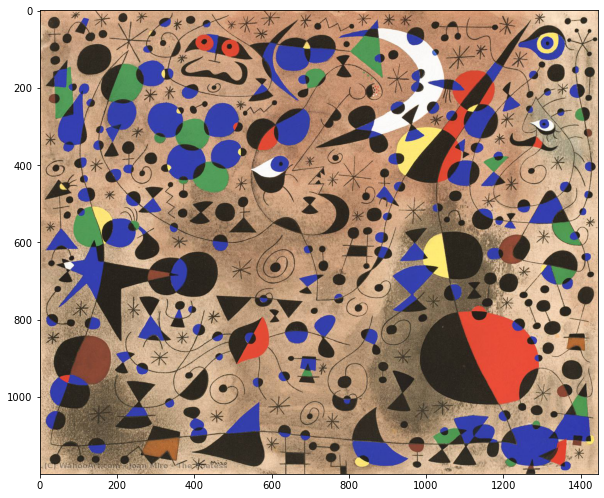

In [33]:
# after clustering, we will restore the original shape
# the code below demonstrates that the original image is restored by reshaping
# to the original dimensions 

fig, ax = plt.subplots(figsize=(10,10))
img = mpimg.imread('./data/miro.jpg')
restored_image = img_reshape.reshape(img.shape[0],img.shape[1], 3)
imgplot = ax.imshow(restored_image)



In a group we will use the KMeans algorithm to reduce the number of colors in the photo.   

Start by reducing the number of colors to 2.  To do so we will have to pass an appropriate argument  when instantianting a KMeans object.  The number of clusters we initiate will determine the number of colors that the image is reduced to.

In order to visualize the groupings, we will replace the original pixel values with the cluster centers associated with the assigned label.

In [34]:
# Reminder of our flattened image
img_reshape.shape

(1734000, 3)

In [61]:
# Instantiate a KMeans object with the argument n_clusters equal to 2
# code here
km = KMeans(n_clusters=8)

In [62]:
# Fit the km object to img_reshape
km.fit(img_reshape)

KMeans()

In [63]:
# view the assigned labels via the labels_ attribute
km.__dict__

{'n_clusters': 8,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'precompute_distances': 'deprecated',
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'n_jobs': 'deprecated',
 'algorithm': 'auto',
 'n_features_in_': 3,
 '_n_threads': 8,
 '_n_init': 10,
 '_tol': 0.3622004064492419,
 '_algorithm': 'elkan',
 'cluster_centers_': array([[176.67950441, 140.51805165, 109.99569023],
        [ 49.86307107,  41.77687807,  32.35241883],
        [ 54.35607875,  63.14032367, 168.26115547],
        [115.32524165, 109.41017817,  77.46206176],
        [227.01886046, 195.46729865, 158.82911559],
        [203.1327386 , 165.44753207, 133.23797081],
        [224.53398697,  76.95132564,  54.5994856 ],
        [250.31801605, 247.8752249 , 244.39479699]]),
 'labels_': array([4, 4, 4, ..., 4, 4, 4]),
 'inertia_': 884514325.8882997,
 'n_iter_': 14}

In [64]:
km.labels_

array([4, 4, 4, ..., 4, 4, 4])

In [65]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([302846, 337327, 169551, 190692, 234079, 427169,  51708,  20628],
       dtype=int64))

In [66]:
# view the cluster centers via the cluster_centers_ attribute
km.cluster_centers_

array([[176.67950441, 140.51805165, 109.99569023],
       [ 49.86307107,  41.77687807,  32.35241883],
       [ 54.35607875,  63.14032367, 168.26115547],
       [115.32524165, 109.41017817,  77.46206176],
       [227.01886046, 195.46729865, 158.82911559],
       [203.1327386 , 165.44753207, 133.23797081],
       [224.53398697,  76.95132564,  54.5994856 ],
       [250.31801605, 247.8752249 , 244.39479699]])

##### interia_ is the best inertia out of all the iterations

In [67]:
# create a list which stores the cluster center associated with each label in a list.  
# The list should be 1734000 elements long

label_centers = []
for label in km.labels_:
    if label == 0:
        label_centers.append(km.cluster_centers_[0])
    else:
        label_centers.append(km.cluster_centers_[1])

In [68]:
label_centers

[array([49.86307107, 41.77687807, 32.35241883]),
 array([49.86307107, 41.77687807, 32.35241883]),
 array([49.86307107, 41.77687807, 32.35241883]),
 array([49.86307107, 41.77687807, 32.35241883]),
 array([49.86307107, 41.77687807, 32.35241883]),
 array([176.67950441, 140.51805165, 109.99569023]),
 array([176.67950441, 140.51805165, 109.99569023]),
 array([49.86307107, 41.77687807, 32.35241883]),
 array([49.86307107, 41.77687807, 32.35241883]),
 array([49.86307107, 41.77687807, 32.35241883]),
 array([49.86307107, 41.77687807, 32.35241883]),
 array([49.86307107, 41.77687807, 32.35241883]),
 array([49.86307107, 41.77687807, 32.35241883]),
 array([49.86307107, 41.77687807, 32.35241883]),
 array([49.86307107, 41.77687807, 32.35241883]),
 array([49.86307107, 41.77687807, 32.35241883]),
 array([49.86307107, 41.77687807, 32.35241883]),
 array([49.86307107, 41.77687807, 32.35241883]),
 array([49.86307107, 41.77687807, 32.35241883]),
 array([49.86307107, 41.77687807, 32.35241883]),
 array([49.863

In [69]:
# Convert list to array
centers_2 = np.array(label_centers)

In [70]:
# check shape is (1734000, 3)
centers_2.shape

(1734000, 3)

In [71]:
# reshape to (1200, 1445, 3)
new_image_2 = centers_2.reshape(1200, 1445, 3)
new_image_2.shape

(1200, 1445, 3)

In [72]:
# Run the cell below to plot the new image.  It should have only 2 colors

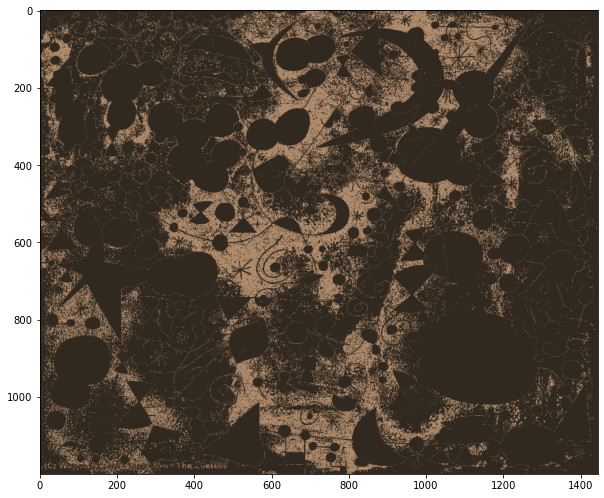

In [73]:
fig, ax = plt.subplots(figsize=(10,10))
imgplot = ax.imshow(new_image_2.astype(int))

# On your own...
try out different numbers of clusters and see their affect on the painting.

In [74]:
#your code here